# Neural Network refining and Testing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Embedding, Conv1D, Dense
from tensorflow.keras.models import Sequential

In [3]:
#import custom functions
import Tools.NN as nn

In [4]:
df = pd.read_csv('./body')
df_target = pd.read_csv('./target')

In [5]:
original_df= df.merge(df_target, on = 'Unnamed: 0')

In [6]:
original_df.drop('Unnamed: 0',axis =1 , inplace = True)

In [7]:
original_df.head()

,review,target
0,Looking for some authentic Japanese food at re...,1
1,Pepe Rosso is where you go when you're in SOHO...,1
2,I had waited to return a couple other times to...,1
3,This place is always busy - partly because it'...,1
4,Love this place! I am not a regular yelper I d...,0


In [8]:
original_df['review'] = original_df['review'].apply(nn.clean_data)

In [9]:
#download if necessary
#nltk.download('stopwords')

In [10]:
original_df['review'] = original_df['review'].apply(nn.remove_stop_words)

In [11]:
corpus = list(original_df['review'])

In [12]:
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(corpus).toarray()
y = original_df['target'].values

In [13]:
cv.get_feature_names()

['able',
 'absolutely',
 'accommodating',
 'across',
 'actually',
 'add',
 'added',
 'addition',
 'affordable',
 'afternoon',
 'ago',
 'al',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'ambiance',
 'ambience',
 'american',
 'amount',
 'another',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apparently',
 'appetizer',
 'appetizers',
 'apple',
 'area',
 'around',
 'arrived',
 'artichoke',
 'asian',
 'ask',
 'asked',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'authentic',
 'available',
 'average',
 'avocado',
 'away',
 'awesome',
 'baby',
 'back',
 'bacon',
 'bad',
 'baked',
 'balls',
 'banana',
 'banh',
 'bar',
 'barely',
 'bartender',
 'bartenders',
 'based',
 'basically',
 'basil',
 'bathroom',
 'bbq',
 'bean',
 'beans',
 'beat',
 'beautiful',
 'beef',
 'beer',
 'beers',
 'behind',
 'believe',
 'belly',
 'benedict',
 'best',
 'better',
 'beyond',
 'bf',
 'big',
 'bill',
 'birthday',
 'biscuit',
 'bit',
 'bite',
 'bites',
 'black

In [14]:
tf_transformer = TfidfTransformer()
X = tf_transformer.fit_transform(X).toarray()

In [15]:
tfidfVectorizer = TfidfVectorizer(max_features =1000)
X = tfidfVectorizer.fit_transform(corpus).toarray()

In [16]:
X_train_s, X_test_s , y_train_s, y_test_s = train_test_split(X, y, random_state=42, stratify = y)

#### we take a look at the other classifiers and see how they perform. These numbers show that the models are doing well, however from the previous models, we see that these high scoring models nearly always predict true due to the skewness of the data. We need to confirm that the Neural net method is not the same as the numbers are fairly similar.

In [17]:
classifiers = [GradientBoostingClassifier(),GaussianNB(),HistGradientBoostingClassifier(),
               RandomForestClassifier(),LogisticRegression()]

for classifier in classifiers:
    classifier.fit(X_train_s,y_train_s)
    print(f'The {classifier}  Accuracy  is {accuracy_score(y_test_s,classifier.predict(X_test_s)) }' )

The GradientBoostingClassifier()  Accuracy  is 0.8982363389697758
The GaussianNB()  Accuracy  is 0.6101903523126198
The HistGradientBoostingClassifier()  Accuracy  is 0.8981803941313865
The RandomForestClassifier()  Accuracy  is 0.8982083665505811
The LogisticRegression()  Accuracy  is 0.8980545182450104


In [18]:
docs = original_df['review']
labels = original_df['target']
X_train, X_test , y_train, y_test = train_test_split(docs, labels , random_state = 42, stratify = labels)

In [19]:
vocab_size = 5000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

In [20]:
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [21]:
model1 = Sequential([
    Embedding(vocab_size, 4, input_length=max_length),
   Conv1D(128, 3, activation='relu'),
    GlobalMaxPooling1D(),
  Dense(5, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [22]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#### Running a more simplified veresion of the simple Neural Network model makes it a better fit. The training and test data shows 90% and 89% accuracy respectively.

In [23]:
history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
6703/6703 [==============================] - 70s 10ms/step - loss: 0.3251 - acc: 0.8989 - val_loss: 0.3074 - val_acc: 0.8982
Epoch 2/20
6703/6703 [==============================] - 70s 10ms/step - loss: 0.3050 - acc: 0.8977 - val_loss: 0.3068 - val_acc: 0.8982
Epoch 3/20
6703/6703 [==============================] - 72s 11ms/step - loss: 0.3017 - acc: 0.8972 - val_loss: 0.3059 - val_acc: 0.8982
Epoch 4/20
6703/6703 [==============================] - 72s 11ms/step - loss: 0.2926 - acc: 0.8981 - val_loss: 0.3074 - val_acc: 0.8981
Epoch 5/20
6703/6703 [==============================] - 73s 11ms/step - loss: 0.2882 - acc: 0.8978 - val_loss: 0.3091 - val_acc: 0.8981
Epoch 6/20
6703/6703 [==============================] - 72s 11ms/step - loss: 0.2820 - acc: 0.8988 - val_loss: 0.3160 - val_acc: 0.8980
Epoch 7/20
6703/6703 [==============================] - 72s 11ms/step - loss: 0.2790 - acc: 0.8988 - val_loss: 0.3213 - val_acc: 0.8956
Epoch 8/20
6703/6703 [==========================

In [24]:
loss, accuracy = model1.evaluate(X_train,y_train)
print('Training Accuracy is {} '.format(accuracy*100))

6703/6703 [==============================] - 26s 4ms/step - loss: 0.2351 - acc: 0.9047
Training Accuracy is 90.47343730926514 


In [25]:
loss, accuracy = model1.evaluate(X_test,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

2235/2235 [==============================] - 9s 4ms/step - loss: 0.3664 - acc: 0.8902
Testing Accuracy is 89.02222514152527 


#### To test how well data is we need to create a series prediction based on the model. Using a confusion matrix we see that there is a good distribution where most of the reviews are classified as truths. This is true for both the training and test set.

In [26]:
y_pred_train = model1.predict(X_train)

In [27]:
rounded_train = [round(x[0]) for x in y_pred_train]

In [28]:
confusion_matrix(y_train, rounded_train)

array([[  2521,  19309],
       [  1125, 191540]])

In [29]:
y_pred = model1.predict(X_test)

In [30]:
rounded = [round(x[0]) for x in y_pred]

In [31]:
confusion_matrix(y_test, rounded)

array([[  294,  6983],
       [  866, 63356]])

#### Based on the train and test data, the model seems to perform fairly well. A test needs to be conducted on the unseen data that was set aside. The data is cleaned and prepared the same way prior to analysis and we find that the model performed well with an 88.9% accuracy on the unseen data. This is only a slight improvement to the NB model which had a suprisingly good prediction for the unseen data.

In [32]:
#load the unseen data and combine 
df2 = pd.read_csv('./Data/untouched_data')
df_target2 = pd.read_csv('./Data/untouched_target')

untouched_df = df2.merge(df_target2,
                         how = 'inner',
                         left_on = ['Unnamed: 0'],
                         right_on = ['Unnamed: 0']
                         )
untouched_df.drop(['Unnamed: 0','user_id','prod_id','rating','date','name'],axis = 1, inplace = True)

In [33]:
untouched_df.head()

,review,target
0,"Overall, great pizza, good service. My wife an...",1
1,I thought I went to Japan when I got in. The ...,1
2,Holy Shmoly!! I just stood 90 minutes for a $2...,1
3,This is a throw back restaurant in an old Ital...,1
4,This is a review by a vegetarian This is stiff...,1


In [34]:
body_un,target_un = nn.NN_cleaning(untouched_df)

In [35]:
loss_un, accuracy_un = model1.evaluate(body_un,target_un)
print('Testing Accuracy is {} '.format(accuracy_un*100))

2235/2235 [==============================] - 10s 4ms/step - loss: 0.3685 - acc: 0.8894
Testing Accuracy is 88.93551230430603 


In [36]:
pred_un = model1.predict(body_un)

In [37]:
rounded_un = [round(x[0]) for x in pred_un]

In [49]:
cm = confusion_matrix(target_un, rounded_un)

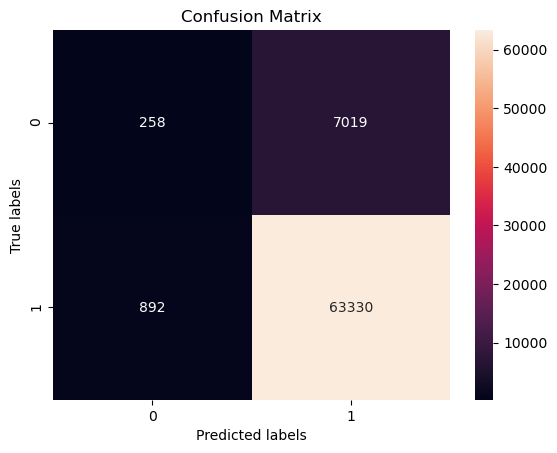

In [57]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
plt.show()